# Task1: Regression

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from catboost import CatBoostRegressor

import lightgbm as lgb
from lightgbm.sklearn import LGBMRegressor

from xgboost import XGBRegressor, plot_importance

from sklearn.linear_model import Ridge, LassoCV, HuberRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from mlxtend.regressor import StackingCVRegressor

import seaborn as sns


plt.style.use('fivethirtyeight')
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

/opt/anaconda3/envs/py38/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
train = pd.read_csv('../clean/train.csv')
test = pd.read_csv('../clean/test.csv')
train[train['density'].isna()]

,property_type,tenure,built_year,num_beds,num_baths,size_sqft,furnishing,subzone,planning_area,price,shop_dist,mrt_dist,commercials_dist,second_school_dist,primary_school_dist,density,available_unit_type_is_studio,available_unit_type_min_room,available_unit_type_max_room


In [3]:
labelEnc = preprocessing.LabelEncoder()
train.planning_area = labelEnc.fit_transform(train.planning_area)
train.subzone = labelEnc.fit_transform(train.subzone)
train.furnishing = labelEnc.fit_transform(train.furnishing)
train.tenure = labelEnc.fit_transform(train.tenure)
train.property_type = labelEnc.fit_transform(train.property_type)
train.available_unit_type_is_studio = labelEnc.fit_transform(train.available_unit_type_is_studio)

test.planning_area = labelEnc.fit_transform(test.planning_area)
test.subzone = labelEnc.fit_transform(test.subzone)
test.furnishing = labelEnc.fit_transform(test.furnishing)
test.tenure = labelEnc.fit_transform(test.tenure)
test.property_type = labelEnc.fit_transform(test.property_type)
test.available_unit_type_is_studio = labelEnc.fit_transform(test.available_unit_type_is_studio)

In [4]:
test.isnull().sum()

property_type                    0
tenure                           0
built_year                       0
num_beds                         0
num_baths                        0
size_sqft                        0
furnishing                       0
subzone                          0
planning_area                    0
shop_dist                        0
mrt_dist                         0
commercials_dist                 0
second_school_dist               0
primary_school_dist              0
density                          0
available_unit_type_is_studio    0
available_unit_type_min_room     0
available_unit_type_max_room     0
dtype: int64

In [5]:
df_X = train.drop(axis=1,columns=['price'])
df_y = train["price"]

In [6]:
df_X.isnull().sum()

property_type                    0
tenure                           0
built_year                       0
num_beds                         0
num_baths                        0
size_sqft                        0
furnishing                       0
subzone                          0
planning_area                    0
shop_dist                        0
mrt_dist                         0
commercials_dist                 0
second_school_dist               0
primary_school_dist              0
density                          0
available_unit_type_is_studio    0
available_unit_type_min_room     0
available_unit_type_max_room     0
dtype: int64

In [7]:
# Convert dataframes to numpy arrays
X, y = df_X.to_numpy(), df_y.to_numpy()
y = y.ravel().astype(int)

# Split dataset in training and test data (20% test data)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)
y_train = y_train
# Normalize data using the sciki-learn StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train, X_val = scaler.transform(X_train), scaler.transform(X_val)

print('Number of features: {}'.format(X_train.shape[1]))
print('Number of samples for training: {}'.format(X_train.shape[0]))
print('Number of samples for testing: {}'.format(X_val.shape[0]))

Number of features: 18
Number of samples for training: 15955
Number of samples for testing: 3989


In [8]:
%%time
randomForestRegressor = RandomForestRegressor().fit(X_train, y_train)
decisionTreeRegressor = DecisionTreeRegressor().fit(X_train, y_train)
adaBoostRegressor = AdaBoostRegressor().fit(X_train, y_train)
gdbtRegressor = GradientBoostingRegressor().fit(X_train, y_train)
catBoostRegressor = CatBoostRegressor().fit(X_train, y_train)

Learning rate set to 0.063422
0:	learn: 4001292.3924773	total: 58.2ms	remaining: 58.2s
1:	learn: 3850829.5524461	total: 60.8ms	remaining: 30.3s
2:	learn: 3711996.8837876	total: 63.2ms	remaining: 21s
3:	learn: 3578743.9558279	total: 65.3ms	remaining: 16.3s
4:	learn: 3458410.0951675	total: 67.2ms	remaining: 13.4s
5:	learn: 3345468.0644387	total: 69.6ms	remaining: 11.5s
6:	learn: 3247801.7847441	total: 71.6ms	remaining: 10.2s
7:	learn: 3154222.4084954	total: 73.5ms	remaining: 9.11s
8:	learn: 3066415.2096851	total: 75.3ms	remaining: 8.29s
9:	learn: 2982604.2887382	total: 77.2ms	remaining: 7.64s
10:	learn: 2906224.8069196	total: 79.3ms	remaining: 7.13s
11:	learn: 2835735.9883527	total: 81.3ms	remaining: 6.69s
12:	learn: 2776088.1221726	total: 83.3ms	remaining: 6.32s
13:	learn: 2717450.4086176	total: 85.4ms	remaining: 6.02s
14:	learn: 2666136.2049199	total: 87.4ms	remaining: 5.74s
15:	learn: 2615813.2423654	total: 89.5ms	remaining: 5.51s
16:	learn: 2563514.4819150	total: 91.4ms	remaining: 5.

In [9]:

%%time
print('Root Mean Squared Errors for all regressors')
print('============================')
rlist = []

for rgs in [decisionTreeRegressor, randomForestRegressor, gdbtRegressor, catBoostRegressor]:
    try:
        # Predict for test samples
        y_pred = rgs.predict(X_val)
        # Calculate the root mean squared error and mean absolute error
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        mae = mean_absolute_error(y_val, y_pred)
        rlist.append(rmse)
    except Exception as e:
        print(e)
        # Handle exception (e.g., a classifier is still None)
        mae = '---'

    print('{} mae: {:.3} rmse: {:.3}'.format(type(rgs).__name__, mae, rmse))


Root Mean Squared Errors for all regressors
DecisionTreeRegressor mae: 2.97e+05 rmse: 1.78e+06
RandomForestRegressor mae: 2.79e+05 rmse: 1.48e+06
GradientBoostingRegressor mae: 5.19e+05 rmse: 2.24e+06
CatBoostRegressor mae: 3.3e+05 rmse: 1.45e+06
CPU times: user 90.2 ms, sys: 6.76 ms, total: 97 ms
Wall time: 89 ms


In [10]:
rlist

[1776969.676138095, 1477582.1642340156, 2242174.722225672, 1451078.140620049]

In [11]:
%%time
X, y = df_X.to_numpy(), df_y.to_numpy()
y = y.ravel().astype(int)

# LightGBM
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.2)
my_imputer = SimpleImputer()
train_X = my_imputer.fit_transform(train_X)
val_X = my_imputer.transform(val_X)

lgbm = lgb.LGBMRegressor(objective='regression', learning_rate=0.05, n_estimators=1000)
lgbm.fit(train_X, train_y, verbose=False)

predictions = lgbm.predict(val_X)

rmse = np.sqrt(mean_squared_error(predictions, val_y))
print("Root Mean Squared Error : " + str(rmse))
rlist.append(rmse)

Root Mean Squared Error : 1364946.340238345
CPU times: user 10.5 s, sys: 4.96 s, total: 15.4 s
Wall time: 2.69 s


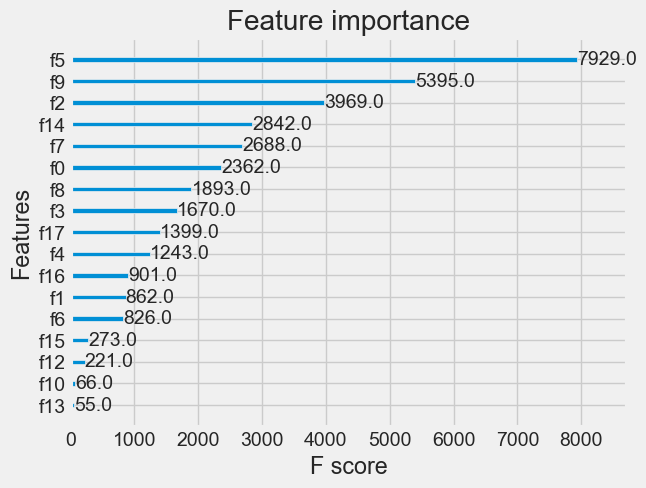

Root Mean Squared Error : 5366508.067908689
CPU times: user 30.1 s, sys: 5.81 s, total: 35.9 s
Wall time: 4.96 s


In [12]:
%%time

X, y = df_X.to_numpy(), df_y.to_numpy()
y = y.ravel().astype(int)

xgb = XGBRegressor(learning_rate=0.05, n_estimators=1000,  objective='reg:gamma')
xgb.fit(X_train, y_train)

pred = xgb.predict(X_val)

plot_importance(xgb)
plt.show()

rmse = np.sqrt(mean_squared_error(pred, val_y))
print("Root Mean Squared Error : " + str(rmse))
rlist.append(rmse)

In [13]:
%%time

stackmodel = StackingCVRegressor(regressors=(decisionTreeRegressor, randomForestRegressor, gdbtRegressor, lgbm, xgb), meta_regressor=randomForestRegressor, use_features_in_secondary=True)
rgs_stack = stackmodel.fit(X_train, y_train)
y_pred = rgs_stack.predict(X_val)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
print('{} mae: {:.3} rmse: {:.3}'.format(type(rgs_stack).__name__, mae, rmse))
rlist.append(rmse)

StackingCVRegressor mae: 2.56e+05 rmse: 1.32e+06
CPU times: user 4min 21s, sys: 55.4 s, total: 5min 16s
Wall time: 1min 28s


In [14]:
rlist

[1776969.676138095,
 1477582.1642340156,
 2242174.722225672,
 1451078.140620049,
 1364946.340238345,
 5366508.067908689,
 1318715.077278292]

Text(0.5, 1.0, 'Distribution plot of RMSE')

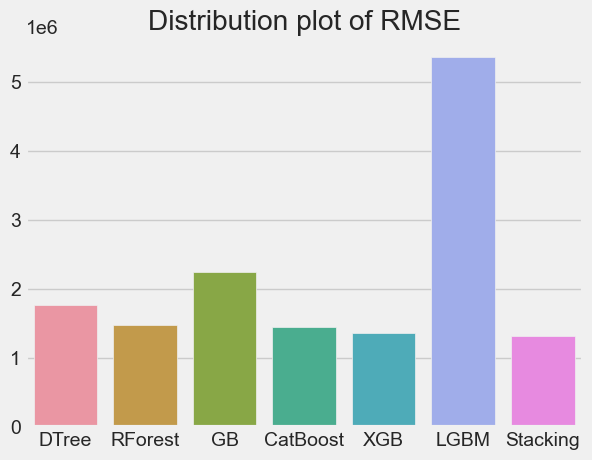

In [15]:
plt.figure()
sns.barplot(x=["DTree", "RForest", "GB","CatBoost", "XGB", "LGBM", "Stacking"], y=rlist)
plt.title("Distribution plot of RMSE")

In [16]:
%%time

param_grid = {
    'n_estimators': [20, 40, 100],
    'max_depth': [3, 10, None],
    'max_features': [12, 18, 27],
    'bootstrap': [True]
             }

rgs = RandomForestRegressor()
model = GridSearchCV(rgs, param_grid, cv=5,
                          scoring='neg_mean_squared_error')
model.fit(X_train, y_train)

# Store the parameters of the best model
best_params = model.best_params_

# Predict with test data on the model with the best found parameters
y_pred = model.predict(val_X)

# Calculate the root mean squared error
best_rmse = np.sqrt(mean_squared_error(y_val, y_pred))

print('Best RandomForestRegressor: {} (RMSE: {:.3f})'.format(best_params, best_rmse))

Best RandomForestRegressor: {'bootstrap': True, 'max_depth': None, 'max_features': 12, 'n_estimators': 20} (RMSE: 11456657.937)
CPU times: user 3min 2s, sys: 1.48 s, total: 3min 4s
Wall time: 3min 4s


In [17]:
pd.Series(y_pred).to_csv('../prediction/1.csv',index=True,index_label=['Id','Predicted'])

In [18]:
%%time

rgs = rgs_stack
X_for_test = scaler.transform(test)
y_pred_stack = rgs.predict(X_for_test)

CPU times: user 1.27 s, sys: 394 ms, total: 1.66 s
Wall time: 370 ms


In [19]:
pd.Series(y_pred_stack).to_csv('../prediction/1.csv',index=True,index_label=['Id','Predicted'])

In [20]:
y_pred_stack

array([1176648., 1453376., 1185742., ..., 3563844.,  508344., 4210725.])

In [21]:
# Catboost

In [22]:
%%time

X_for_test = scaler.transform(test)
y_pred_catboost = catBoostRegressor.predict(X_for_test)

CPU times: user 22.5 ms, sys: 17.3 ms, total: 39.8 ms
Wall time: 5.71 ms


In [23]:
y_pred_catboost

array([1192518.9381993 , 1596743.72909123, 1297064.24143931, ...,
       3213730.65703766,  554366.3732714 , 3751875.057321  ])

In [24]:
pd.Series(y_pred_catboost).to_csv('../prediction/1.csv',index=True,index_label=['Id','Predicted'])

In [25]:
#save model
import joblib

joblib.dump(rgs, '../prediction/rgs.pkl')

['../prediction/rgs.pkl']